In [ ]:

"""
Churn Prediction Model using RandomForestClassifier
This script implements a machine learning pipeline for predicting customer churn.
It includes feature engineering, preprocessing, feature selection, and hyperparameter tuning.
The model is evaluated on test and evaluation datasets, optimized for recall to identify churn cases.
Author: Rex Mainimo
Date: June 26, 2025
"""

'\nChurn Prediction Model using RandomForestClassifier\nThis script implements a machine learning pipeline for predicting customer churn.\nIt includes feature engineering, preprocessing, feature selection, and hyperparameter tuning.\nThe model is evaluated on test and evaluation datasets, optimized for recall to identify churn cases.\nAuthor: [Your Name]\nDate: June 26, 2025\n'

Telecom Customer Churn Analysis.   
Dataset from Kaggle, link: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mnassrib/telecom-churn-datasets")

print("Path to dataset files:", path)

c:\Users\maini\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 99.5k/99.5k [00:00<00:00, 611kB/s]

Extracting files...


Path to dataset files: C:\Users\maini\.cache\kagglehub\datasets\mnassrib\telecom-churn-datasets\versions\1


In [2]:

path = r"C:\Users\maini\.cache\kagglehub\datasets\mnassrib\telecom-churn-datasets\versions\1"

train_df = pd.read_csv(path + "\\churn-bigml-80.csv")
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [4]:
train_df.describe() 

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
train_df.shape

(2666, 20)

In [6]:
train_df.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

In [8]:
train_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

For a proper Data Pipeline and SQL-focused project, I will load the training and evaluating dataset into MySQL(local) database   
The dataset can be downloaded from the Kaggle link above.

In [7]:
# train data
engine = create_engine("mysql+pymysql://root:@localhost/telecom_churn_dataset") 

# train_df.to_sql(name="train_data", con=engine, if_exists="replace", index=False) 
# print("DataFrame written to SQL table successfully.")

In [8]:
# evaluation data

eval_df = pd.read_csv(path + "\\churn-bigml-20.csv") 
eval_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [9]:
eval_df.info() 
eval_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [10]:
eval_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [16]:

eval_df.to_sql(name="eval_data", con=engine, if_exists="replace", index=False) 
print("Eval DataFrame written to SQL table successfully.")

Eval DataFrame written to SQL table successfully.


Extracting training dataset from the database.

In [ ]:
df = ""

try:
    connection = engine.connect()
    print("Connection successful, fetching data from SQL table.") 
    
    training_query = "SELECT * FROM train_data" 
    df = pd.read_sql(training_query, con=engine)
    connection.close()
except Exception as e:
    print(f"SQL Connection or query failed due to: {e}")
    print("defaulting to csv file.") 
    df = pd.read_csv("churn-bigml-80.csv")


df.head()

Connection successful, fetching data from SQL table.


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Exploratory Data Analysis

In [13]:
df.Churn.value_counts()

Churn
0    2278
1     388
Name: count, dtype: int64

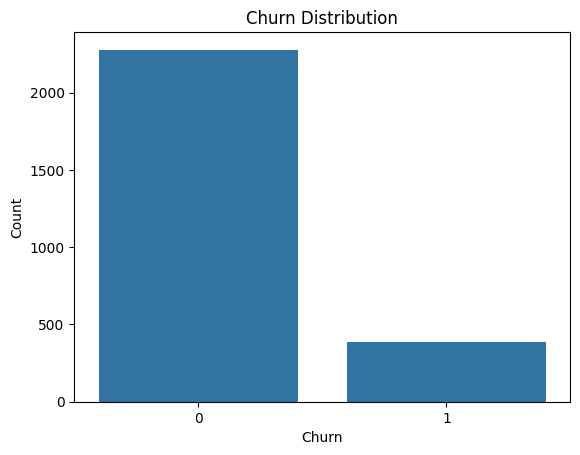

Churn Rate:
 Churn
0    85.45
1    14.55
Name: proportion, dtype: float64%


In [15]:
sns.countplot(x="Churn", data=df)

plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

#Churn rate
churn_rate = df.Churn.value_counts(normalize=True) * 100
print(f"Churn Rate:\n {churn_rate.round(2)}%") 

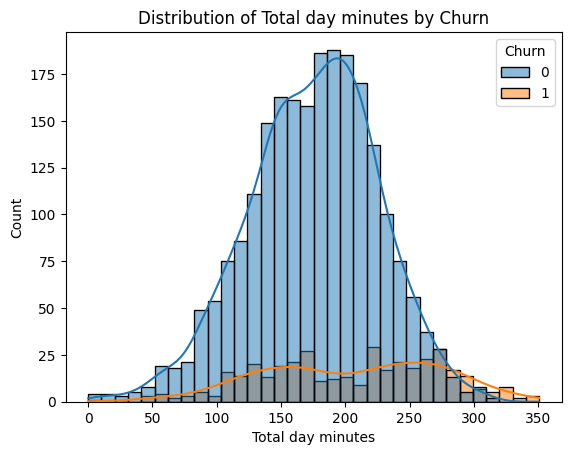

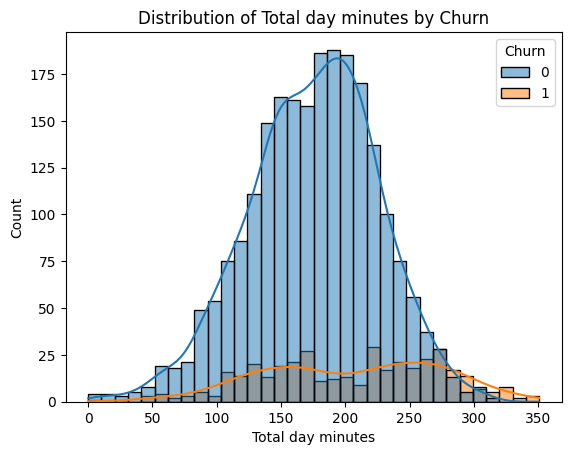

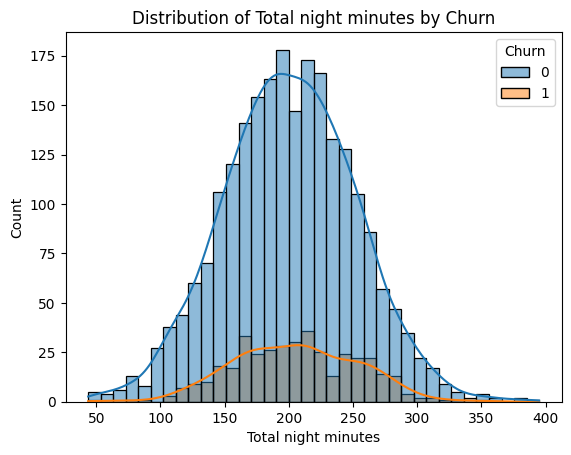

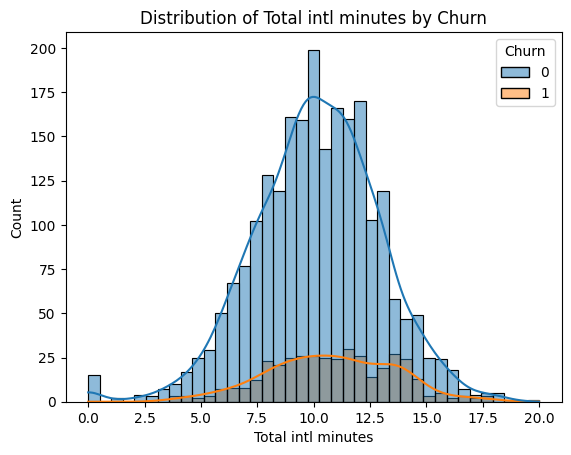

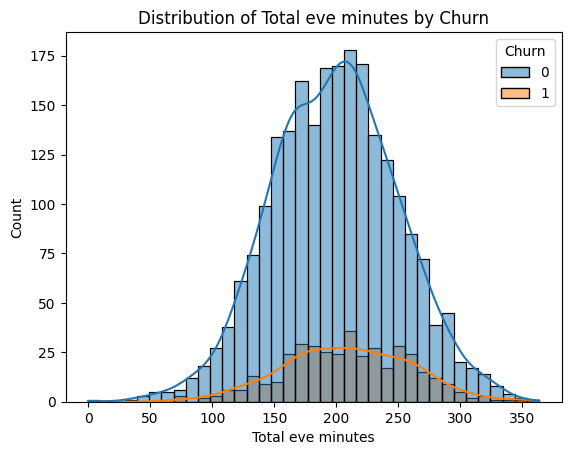

In [15]:
num_columns = ["Total day minutes", "Total day minutes", "Total night minutes", "Total intl minutes", "Total eve minutes"]
for col in num_columns:
    sns.histplot(data=df, x=col, hue="Churn", kde=True)
    plt.title("Distribution of " + col + " by Churn")
    plt.show()

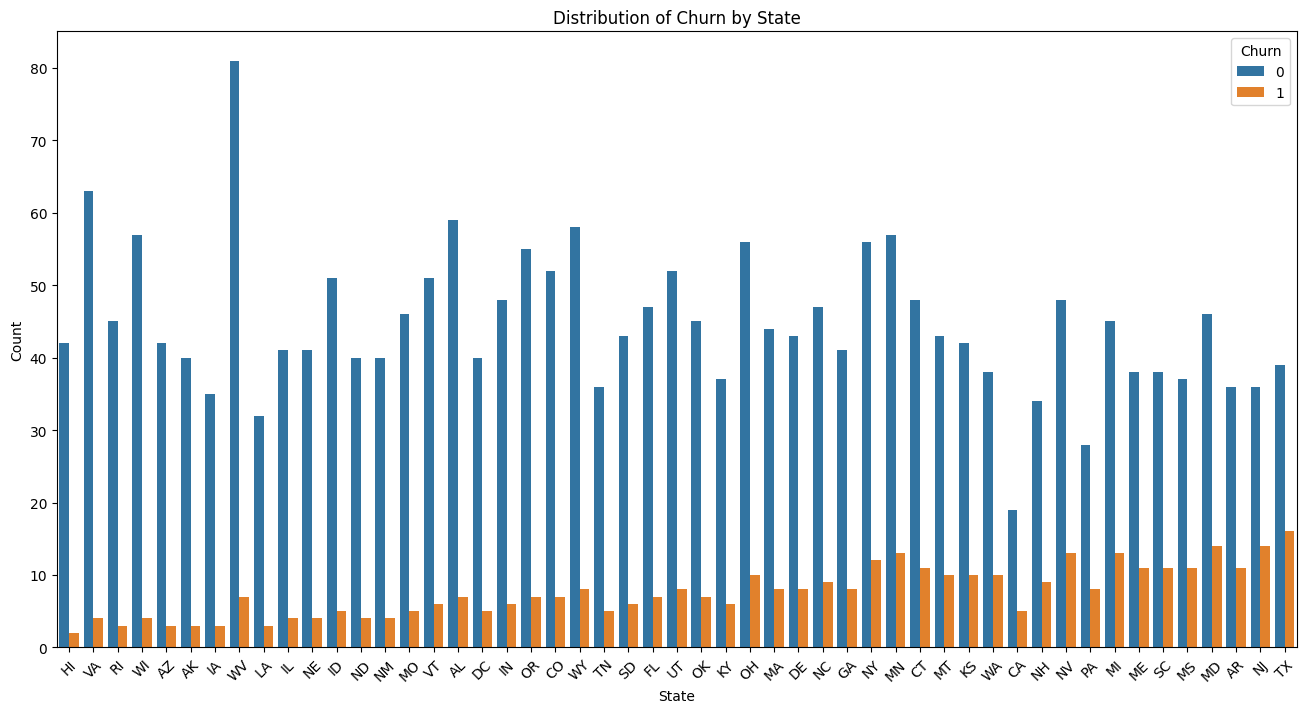

In [16]:
churn_rate_by_state = df.groupby("State")["Churn"].mean().sort_values()

ordered_states = churn_rate_by_state.index.tolist()

plt.figure(figsize=(16, 8))
sns.countplot(x="State", hue="Churn", data=df, order=ordered_states) 
plt.title("Distribution of Churn by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

A state like Texas appear to have a higher churn rate than most states.

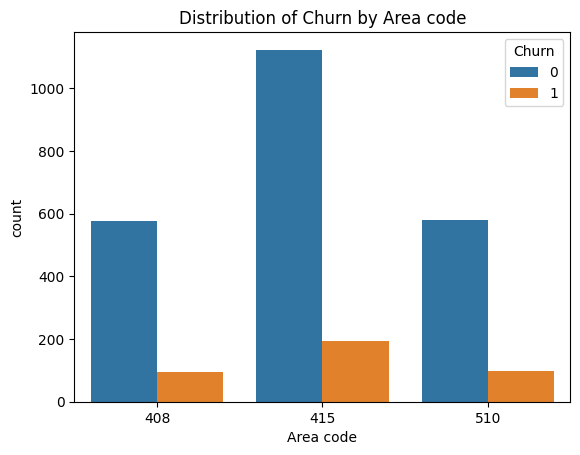

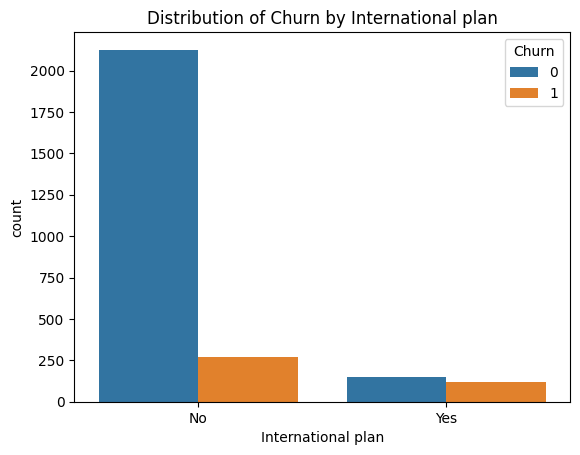

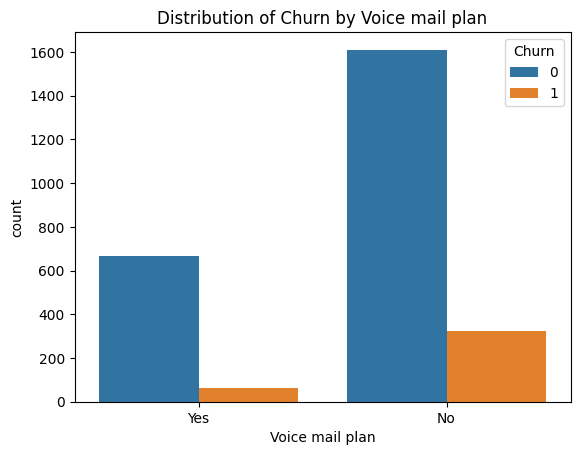

In [17]:
cat_columns = ["Area code", "International plan", "Voice mail plan"]
for col in cat_columns:
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Distribution of Churn by {col}")
    plt.show()


<Axes: >

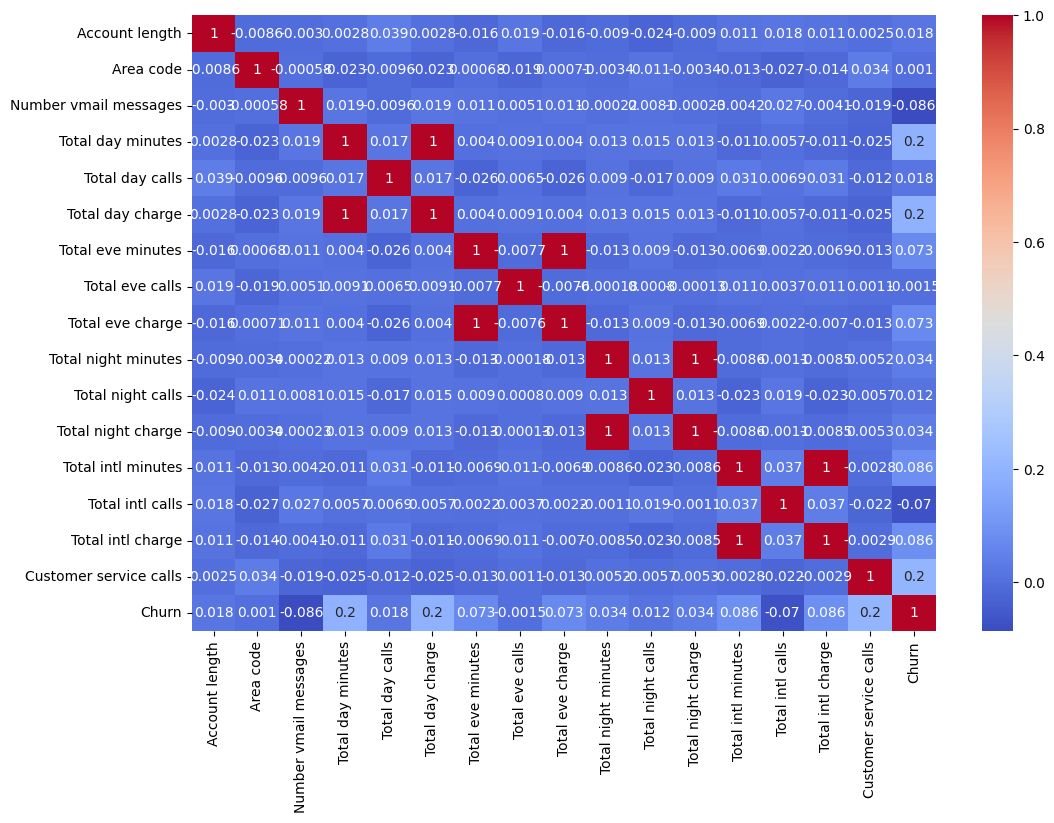

In [18]:
num_cols = df.select_dtypes(exclude=["object"])
corr = num_cols.corr(numeric_only=True)

plt.figure(figsize=(12, 8)) 
sns.heatmap(corr, annot=True, cmap="coolwarm")


In [19]:
df.groupby("International plan")["Churn"].mean() 

International plan
No     0.112688
Yes    0.437037
Name: Churn, dtype: float64

Feature Engineering

In [55]:
counts_series = df["Customer service calls"].value_counts()

for value, count in counts_series.items():
    print(f"Customer service calls: {value}, Count: {count}")   

Customer service calls: 1, Count: 945
Customer service calls: 2, Count: 608
Customer service calls: 0, Count: 555
Customer service calls: 3, Count: 348
Customer service calls: 4, Count: 133
Customer service calls: 5, Count: 49
Customer service calls: 6, Count: 17
Customer service calls: 7, Count: 8
Customer service calls: 9, Count: 2
Customer service calls: 8, Count: 1


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Transformer for mapping "Yes"/"No" to 1/0
class BinaryMapper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
        X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})
        return X

# Transformer for creating total minutes and calls
class TotalFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X["Total minutes"] = X["Total day minutes"] + X["Total eve minutes"] + X["Total night minutes"] + X["Total intl minutes"]
        X["Total calls"] = X["Total day calls"] + X["Total eve calls"] + X["Total night calls"] + X["Total intl calls"]
        return X

# Transformer for creating high customer service calls
class HighServiceCalls(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X["High customer service calls"] = (X["Customer service calls"] > 4).astype(int)
        return X

In [45]:
numeric_cols = [
    "Account length", "Number vmail messages", "Total day minutes",
    "Total day calls", "Total day charge", "Total eve minutes",
    "Total eve calls", "Total eve charge", "Total night minutes",
    "Total night calls", "Total night charge", "Total intl minutes",
    "Total intl calls", "Total intl charge", "Customer service calls",
    "International plan", "Voice mail plan", "Total minutes",
    "Total calls", "High customer service calls"
]

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

 

# Preprocessor for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", sparse_output=False), ["State", "Area code"]),
        ("num", StandardScaler(), numeric_cols)
    ],
    remainder="passthrough"
)

feature_selection = Pipeline(steps=[
    ("selector", SelectFromModel(estimator=RandomForestClassifier(class_weight="balanced", random_state=42)))
])

# Full pipeline
pipeline = Pipeline(steps=[
    ("binary_mapper", BinaryMapper()),
    ("total_features", TotalFeatures()),
    ("high_service_calls", HighServiceCalls()),
    ("preprocessor", preprocessor),
    ("feature_selection", feature_selection),
    ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
])

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Parameter grid Random Forest
param_grid = {
    "feature_selection__selector__estimator__n_estimators": [100, 300],
    "feature_selection__selector__estimator__max_depth": [5, 10],
    "classifier__n_estimators": [100, 300],
    "classifier__max_depth": [5, 10],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2]
}

# Data split
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="recall", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score (CV):", grid_search.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


c:\Users\maini\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\maini\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\maini\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'feature_selection__selector__estimator__max_depth': 5, 'feature_selection__selector__estimator__n_estimators': 100}
Best Recall Score (CV): 0.6116340560549973


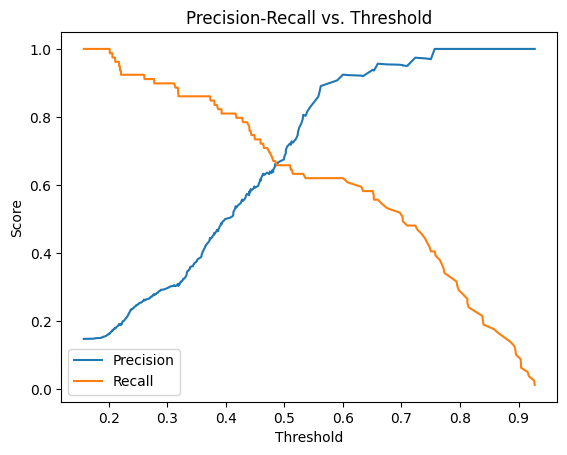


Threshold: 0.3
Recall: 0.8987341772151899
Precision: 0.29707112970711297
F1-Score: 0.44654088050314467

Threshold: 0.35
Recall: 0.8607594936708861
Precision: 0.37777777777777777
F1-Score: 0.525096525096525

Threshold: 0.4
Recall: 0.810126582278481
Precision: 0.5039370078740157
F1-Score: 0.6213592233009708

Threshold: 0.45
Recall: 0.7341772151898734
Precision: 0.5979381443298969
F1-Score: 0.6590909090909091

Threshold: 0.5
Recall: 0.6582278481012658
Precision: 0.6842105263157895
F1-Score: 0.6709677419354839


In [ ]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix 
from sklearn.metrics import precision_recall_curve, f1_score, recall_score, precision_score

best_model = grid_search.best_estimator_

#y_pred = best_model.predict(X_test) 
y_proba = best_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# precision vs. recall
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs. Threshold")
plt.show()

for threshold in [0.3, 0.35, 0.4, 0.45, 0.5]:
    y_pred = (y_proba >= threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print("Recall:", recall_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))



The primary objective of this churn prediction model is to maximize the capture of True Positives, i.e., customers who are actually at risk of churning. By applying class balancing and model adjustments, we significantly improved the model's ability to correctly identify churners.

This approach naturally increases the number of False Positives — customers predicted to churn who would have otherwise stayed. However, this trade-off is acceptable in a churn prevention context, as it enables the business to proactively target at-risk customers, ultimately reducing overall churn and protecting revenue.

In other words, it is better to mistakenly intervene with some loyal customers than to miss the opportunity to retain actual churners.

The focus then will be on Recall: How good the model is at capturing actual positives(churners) which often lowers Precision!

In [49]:
threshold = 0.4

y_pred = (y_proba >= threshold).astype(int)
test_recall = recall_score(y_test, y_pred)
print("Test Recall Score:", test_recall)

# Detailed evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Recall Score: 0.810126582278481

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       455
           1       0.50      0.81      0.62        79

    accuracy                           0.85       534
   macro avg       0.73      0.84      0.77       534
weighted avg       0.90      0.85      0.87       534


Confusion Matrix:
 [[392  63]
 [ 15  64]]


In [ ]:
# selected features from SelectFromModel
feature_selection_step = best_model.named_steps["feature_selection"].named_steps["selector"]
selected_features_mask = feature_selection_step.get_support()

# feature names after preprocessing
preprocessor = best_model.named_steps["preprocessor"]
feature_names = preprocessor.get_feature_names_out()

# Filter selected feature names
selected_features = feature_names[selected_features_mask]
print("Selected Features:", selected_features)

# feature importances from the classifier
classifier = best_model.named_steps["classifier"]
importances = classifier.feature_importances_
feature_importance = dict(zip(selected_features, importances))
print("\nFeature Importances:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

Selected Features: ['num__Number vmail messages' 'num__Total day minutes'
 'num__Total day calls' 'num__Total day charge' 'num__Total eve minutes'
 'num__Total eve calls' 'num__Total eve charge' 'num__Total night minutes'
 'num__Total night calls' 'num__Total night charge'
 'num__Total intl minutes' 'num__Total intl calls'
 'num__Total intl charge' 'num__Customer service calls'
 'num__Total minutes' 'num__High customer service calls']

Feature Importances:
num__Total day minutes: 0.1833
num__Customer service calls: 0.1644
num__Total day charge: 0.1434
num__Total minutes: 0.1405
num__High customer service calls: 0.0525
num__Number vmail messages: 0.0460
num__Total intl charge: 0.0445
num__Total intl minutes: 0.0426
num__Total intl calls: 0.0341
num__Total eve charge: 0.0338
num__Total eve minutes: 0.0336
num__Total night charge: 0.0207
num__Total night minutes: 0.0176
num__Total night calls: 0.0170
num__Total day calls: 0.0155
num__Total eve calls: 0.0105


Final Evaluation with Evaluation dataset

In [ ]:
df_eval = ""

 
try:
    connection = engine.connect()
    eval_query = "SELECT * FROM eval_data"
    print("Connection successful, fetching data from SQL table.")
    df_eval = pd.read_sql(eval_query, con=engine)
    connection.close()
except Exception as e:
    print(f"Connection or query failed, due to {e}") 
    print("defaulting to csv file.") 
    df_eval = pd.read_csv("churn-bigml-20.csv")


df_eval.head()

Connection successful, fetching data from SQL table.


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [58]:
X_eval = df_eval.drop("Churn", axis=1) 
y_eval = df_eval["Churn"]


print("Evaluation Dataset dtypes:\n", X_eval.dtypes)
print("\nTarget Distribution:\n", y_eval.value_counts(normalize=True))

# Best Model from GridSearchCV
best_model = grid_search.best_estimator_
print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)

# Predict on Evaluation Dataset
y_proba_eval = best_model.predict_proba(X_eval)[:, 1]
threshold = 0.4 
y_pred_eval = (y_proba_eval >= threshold).astype(int)


Evaluation Dataset dtypes:
 State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
dtype: object

Target Distribution:
 Churn
0    0.857571
1    0.142429
Name: proportion, dtype: float64

Best Parameters from GridSearchCV: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'feature_selection__selector__estimator__max_depth': 


Evaluation Dataset Results:
Test Recall Score: 0.8315789473684211

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       572
           1       0.46      0.83      0.60        95

    accuracy                           0.84       667
   macro avg       0.72      0.84      0.75       667
weighted avg       0.90      0.84      0.86       667


Confusion Matrix:
 [[481  91]
 [ 16  79]]


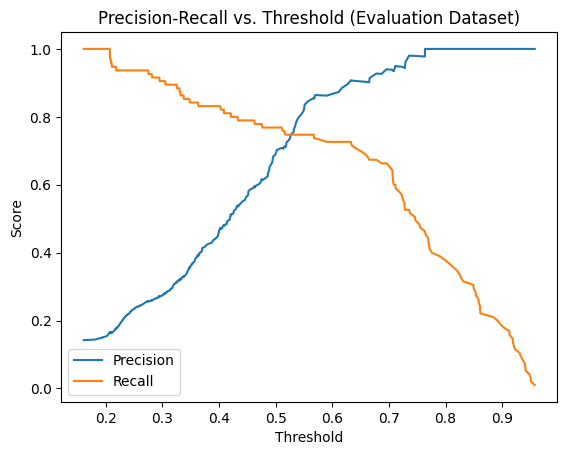

In [59]:
# Model Evaluation
print("\nEvaluation Dataset Results:")
print("Test Recall Score:", recall_score(y_eval, y_pred_eval))
print("\nClassification Report:\n", classification_report(y_eval, y_pred_eval))
print("\nConfusion Matrix:\n", confusion_matrix(y_eval, y_pred_eval))

# Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_eval, y_proba_eval)
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs. Threshold (Evaluation Dataset)")
plt.show()